# **Integración de Datos**
    Busca los datos del Censo de Población y Vivienda 2020 por municipio y los indicadores de pobreza generados por Coneval en el año 2020. Integra estos archivos en un sólo dataframe, de acuerdo al municipio. Elimina los indicadores de Coneval que no están asociados a tu reto. Verifica el número de registros y columnas del archivo. El número de registros del archivo debe ser igual al número inicial de municipios (2469) y el número de columnas el número inicial más las 2 que agregaste de los indicadores seleccionados.

In [236]:
import pandas as pd
import numpy as np

In [237]:
# Load the data
INEGI = pd.read_csv('datosINEGI.csv')
CONEVAL = pd.read_csv('datosCONEVAL.csv', encoding='latin1')

# Filter rows where NOM_LOC == "Total del Municipio"
INEGI_total = INEGI[INEGI['NOM_LOC'] == "Total del Municipio"]

/var/folders/nq/zht86vzj6n5g3py55h5xd7xr0000gn/T/ipykernel_45837/3852254959.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  INEGI = pd.read_csv('datosINEGI.csv')


In [238]:
print(INEGI.shape)
INEGI.head()


(195662, 286)


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,...,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,...,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,...,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,...,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,...,732,205,212,48,41,39,62,530,20,*


In [239]:
print(CONEVAL.shape)
CONEVAL.tail()

(2469, 37)


,clave_entidad,entidad_federativa,clave_municipio,municipio,poblacion,pobreza,pobreza_pob,pobreza_e,pobreza_e_pob,pobreza_m,...,ic_ali,ic_ali_pob,carencias,carencias_pob,carencias3,carencias3_pob,plp,plp_pob,plp_e,plp_e_pob
2464,32,Zacatecas,32054,Villa Hidalgo,"20,674",74.9,"15,483",9.0,"1,863",65.9,...,29.0,"5,985",91.6,"18,940",19.5,"4,039",79.2,"16,377",41.5,"8,574"
2465,32,Zacatecas,32055,Villanueva,"32,969",50.6,"16,673",4.3,"1,415",46.3,...,16.1,"5,321",80.9,"26,672",14.4,"4,735",58.9,"19,407",23.2,"7,634"
2466,32,Zacatecas,32056,Zacatecas,"149,864",23.4,"35,054",2.6,"3,822",20.8,...,14.1,"21,190",50.3,"75,367",7.5,"11,199",34.6,"51,866",11.0,"16,491"
2467,32,Zacatecas,32057,Trancoso,"20,270",63.9,"12,962",6.4,"1,290",57.6,...,26.0,"5,268",81.2,"16,462",14.4,"2,910",74.5,"15,098",37.9,"7,678"
2468,32,Zacatecas,32058,Santa Marï¿½a de la Paz,"2,792",48.0,"1,339",2.4,68,45.5,...,13.6,380,80.9,"2,258",9.0,251,55.4,"1,546",19.5,545


In [240]:
print(INEGI_total.shape)
INEGI_total.head()

(2469, 286)


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
6,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,NaN,NaN,NaN,948990,...,251719,178619,130290,80951,56131,3299,7293,74227,731,*
574,1,Aguascalientes,2,Asientos,0,Total del Municipio,NaN,NaN,NaN,51536,...,10682,4526,3882,596,556,377,1447,7206,177,*
749,1,Aguascalientes,3,Calvillo,0,Total del Municipio,NaN,NaN,NaN,58250,...,13666,6553,4749,1382,1352,443,904,8061,138,*
918,1,Aguascalientes,4,Cosío,0,Total del Municipio,NaN,NaN,NaN,17000,...,3424,1741,1664,223,191,139,414,1912,50,*
985,1,Aguascalientes,5,Jesús María,0,Total del Municipio,NaN,NaN,NaN,129929,...,31408,19920,13483,9296,6582,480,1150,11447,148,*


In [ ]:
# Make MUN in INEGI_total be ENTIDAD * 1000 + MUN
INEGI_total['MUN'] = INEGI_total['ENTIDAD'] * 1000 + INEGI_total['MUN']

# Drop columns that are not needed from CONEVAL(only columns needed are 'clave_municipio', 'pobreza_m', "ic_asalud")
CONEVAL = CONEVAL[['clave_municipio', 'pobreza_m', 'ic_asalud']]

# MERGE INEGI_total and CONEVAL from MUN and clave_municipio
merged = pd.merge(INEGI_total, CONEVAL, left_on='MUN', right_on='clave_municipio')
# Drop clave_municipio
merged = merged.drop(columns=['clave_municipio'])

print(merged.shape)
merged.tail()


(2469, 288)


/var/folders/nq/zht86vzj6n5g3py55h5xd7xr0000gn/T/ipykernel_45837/488447234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INEGI_total['MUN'] = INEGI_total['ENTIDAD'] * 1000 + INEGI_total['MUN']


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC,pobreza_m,ic_asalud
2464,32,Zacatecas,32054,Villa Hidalgo,0,Total del Municipio,NaN,NaN,NaN,19446,...,1090,109,106,160,744,3569,80,*,65.9,18.0
2465,32,Zacatecas,32055,Villanueva,0,Total del Municipio,NaN,NaN,NaN,31558,...,5181,643,569,306,746,4252,101,*,46.3,31.2
2466,32,Zacatecas,32056,Zacatecas,0,Total del Municipio,NaN,NaN,NaN,149607,...,28630,11944,7639,681,1185,8783,129,*,20.8,19.5
2467,32,Zacatecas,32057,Trancoso,0,Total del Municipio,NaN,NaN,NaN,20455,...,1854,204,185,130,677,3274,59,*,57.6,15.6
2468,32,Zacatecas,32058,Santa María de la Paz,0,Total del Municipio,NaN,NaN,NaN,2767,...,427,37,23,59,114,542,32,*,45.5,14.3


# Entendimiento y exploración de los datos del negocio 

In [242]:
print(merged.shape)

# Variables a trabajar: PPoblación de 15 años y más con secundaria completa:P15SEC_CO, Poblacion femenina:POBFEM, 
# Poblacion masculina:POBMAS, Poblacion afiliada a servicios de salud:PDER_SS, Poblacion sin afiliacion a servicios de salud: PSINDER.

print("Variables cuantitativas seleccionadas:")
print("P15SEC_CO: Población de 15 años y más con secundaria completa")
print("POBFEM: Poblacion femenina")
print("POBMAS: Poblacion masculina")
print("PDER_ss: Poblacion afiliada a servicios de salud")
print("PSINDER: Poblacion sin afiliacion a servicios de salud")

# Seleccionar las variables cuantitativas
data = merged[['POBTOT', 'P15SEC_CO', 'POBFEM', 'POBMAS', 'PDER_SS', 'PSINDER', 'pobreza_m', 'ic_asalud']]
data = data.dropna()
print(data.shape)
data.head()

(2469, 288)
Variables cuantitativas seleccionadas:
P15SEC_CO: Población de 15 años y más con secundaria completa
POBFEM: Poblacion femenina
POBMAS: Poblacion masculina
PDER_ss: Poblacion afiliada a servicios de salud
PSINDER: Poblacion sin afiliacion a servicios de salud
(2469, 8)


,POBTOT,P15SEC_CO,POBFEM,POBMAS,PDER_SS,PSINDER,pobreza_m,ic_asalud
0,948990,182540,486917,462073,774363,173199,21.7,20.0
1,51536,13014,26275,25261,43922,7590,36.0,16.5
2,58250,13314,29687,28563,46370,11832,41.3,21.0
3,17000,4323,8708,8292,14651,2347,33.7,17.6
4,129929,24176,65710,64219,102428,27299,23.1,21.1


In [243]:
# fix data types
data['POBTOT'] = data['POBTOT'].astype(int)
data['P15SEC_CO'] = data['P15SEC_CO'].astype(int)
data['POBFEM'] = data['POBFEM'].astype(int)
data['POBMAS'] = data['POBMAS'].astype(int)
data['PDER_SS'] = data['PDER_SS'].astype(int)
data['PSINDER'] = data['PSINDER'].astype(int)

data['pobreza_m'] = data['pobreza_m'].astype('string')
data['ic_asalud'] = data['ic_asalud'].astype('string')

data['pobreza_m'] = data['pobreza_m'].str.replace(',', '')
data['ic_asalud'] = data['ic_asalud'].str.replace(',', '')

# drop rows with value n.d or nan
data = data[data['pobreza_m'] != 'n.d']
data = data[data['ic_asalud'] != 'n.d']
data = data.dropna()


data['pobreza_m'] = data['pobreza_m'].astype(float)
data['ic_asalud'] = data['ic_asalud'].astype(float)


print(data.shape)
print(data.dtypes)
data.head()

(2466, 8)
POBTOT         int64
P15SEC_CO      int64
POBFEM         int64
POBMAS         int64
PDER_SS        int64
PSINDER        int64
pobreza_m    float64
ic_asalud    float64
dtype: object


,POBTOT,P15SEC_CO,POBFEM,POBMAS,PDER_SS,PSINDER,pobreza_m,ic_asalud
0,948990,182540,486917,462073,774363,173199,21.7,20.0
1,51536,13014,26275,25261,43922,7590,36.0,16.5
2,58250,13314,29687,28563,46370,11832,41.3,21.0
3,17000,4323,8708,8292,14651,2347,33.7,17.6
4,129929,24176,65710,64219,102428,27299,23.1,21.1


In [244]:
# Turn all columns to percentages by dividing by the total population

data['P15SEC_CO'] = data['P15SEC_CO'] / data['POBTOT']
data['POBFEM'] = data['POBFEM'] / data['POBTOT']
data['POBMAS'] = data['POBMAS'] / data['POBTOT']
data['PDER_SS'] = data['PDER_SS'] / data['POBTOT']
data['PSINDER'] = data['PSINDER'] / data['POBTOT']

# Drop POBTOT
data = data.drop(columns=['POBTOT'])



In [245]:
# Medidas de tendencia central
print("Media")
print(data.mean())
print("\n Mediana")
print(data.median())
print("\n Moda")
print(data.mode())

Media
P15SEC_CO     0.181779
POBFEM        0.511919
POBMAS        0.488081
PDER_SS       0.756892
PSINDER       0.241407
pobreza_m    44.765410
ic_asalud    25.109165
dtype: float64

 Mediana
P15SEC_CO     0.179018
POBFEM        0.512515
POBMAS        0.487485
PDER_SS       0.772546
PSINDER       0.226505
pobreza_m    46.000000
ic_asalud    23.200000
dtype: float64

 Moda
      P15SEC_CO  POBFEM  POBMAS   PDER_SS   PSINDER  pobreza_m  ic_asalud
0      0.185841     0.5     0.5  0.161426  0.114014       46.6       21.2
1           NaN     NaN     NaN  0.221258  0.181818        NaN        NaN
2           NaN     NaN     NaN  0.276171       NaN        NaN        NaN
3           NaN     NaN     NaN  0.334783       NaN        NaN        NaN
4           NaN     NaN     NaN  0.368219       NaN        NaN        NaN
...         ...     ...     ...       ...       ...        ...        ...
2461        NaN     NaN     NaN  0.975155       NaN        NaN        NaN
2462        NaN     NaN     NaN  

In [246]:
# Medidas de dispersión
print("\n Desviación estándar")
print(data.std())
print("\n Varianza")
print(data.var())
print("\n Rango")
print(data.max() - data.min())



 Desviación estándar
P15SEC_CO     0.043814
POBFEM        0.015435
POBMAS        0.015435
PDER_SS       0.108406
PSINDER       0.108135
pobreza_m    12.279006
ic_asalud    12.458136
dtype: float64

 Varianza
P15SEC_CO      0.001920
POBFEM         0.000238
POBMAS         0.000238
PDER_SS        0.011752
PSINDER        0.011693
pobreza_m    150.773988
ic_asalud    155.205157
dtype: float64

 Rango
P15SEC_CO     0.279585
POBFEM        0.167593
POBMAS        0.167593
PDER_SS       0.827759
PSINDER       0.828175
pobreza_m    79.800000
ic_asalud    82.800000
dtype: float64


In [247]:
# Normalizar los datos entre 0 y 1
data = (data - data.min()) / (data.max() - data.min())


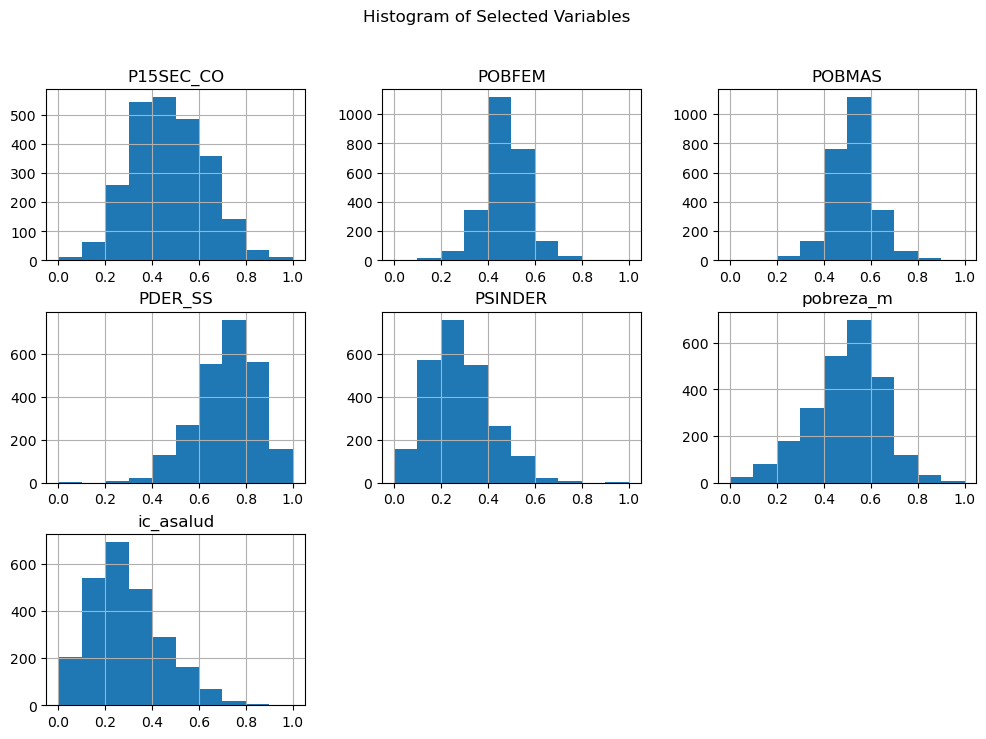

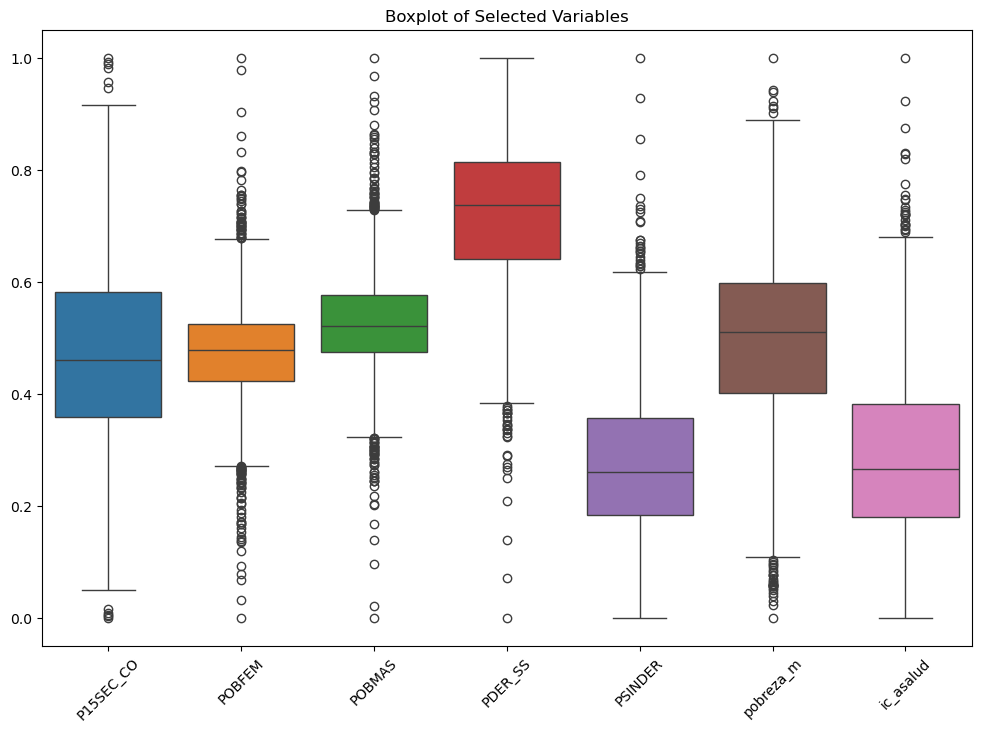

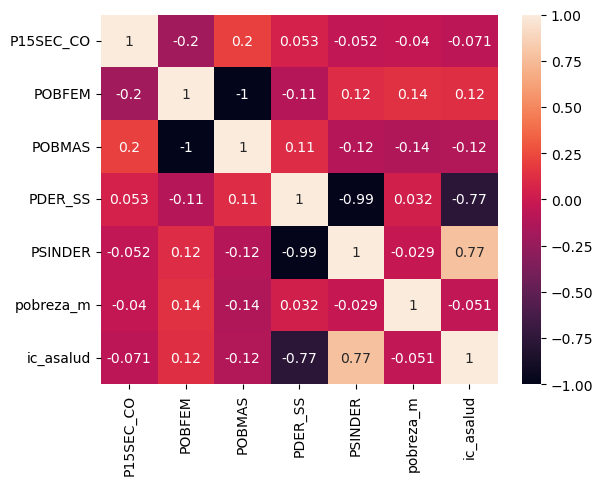

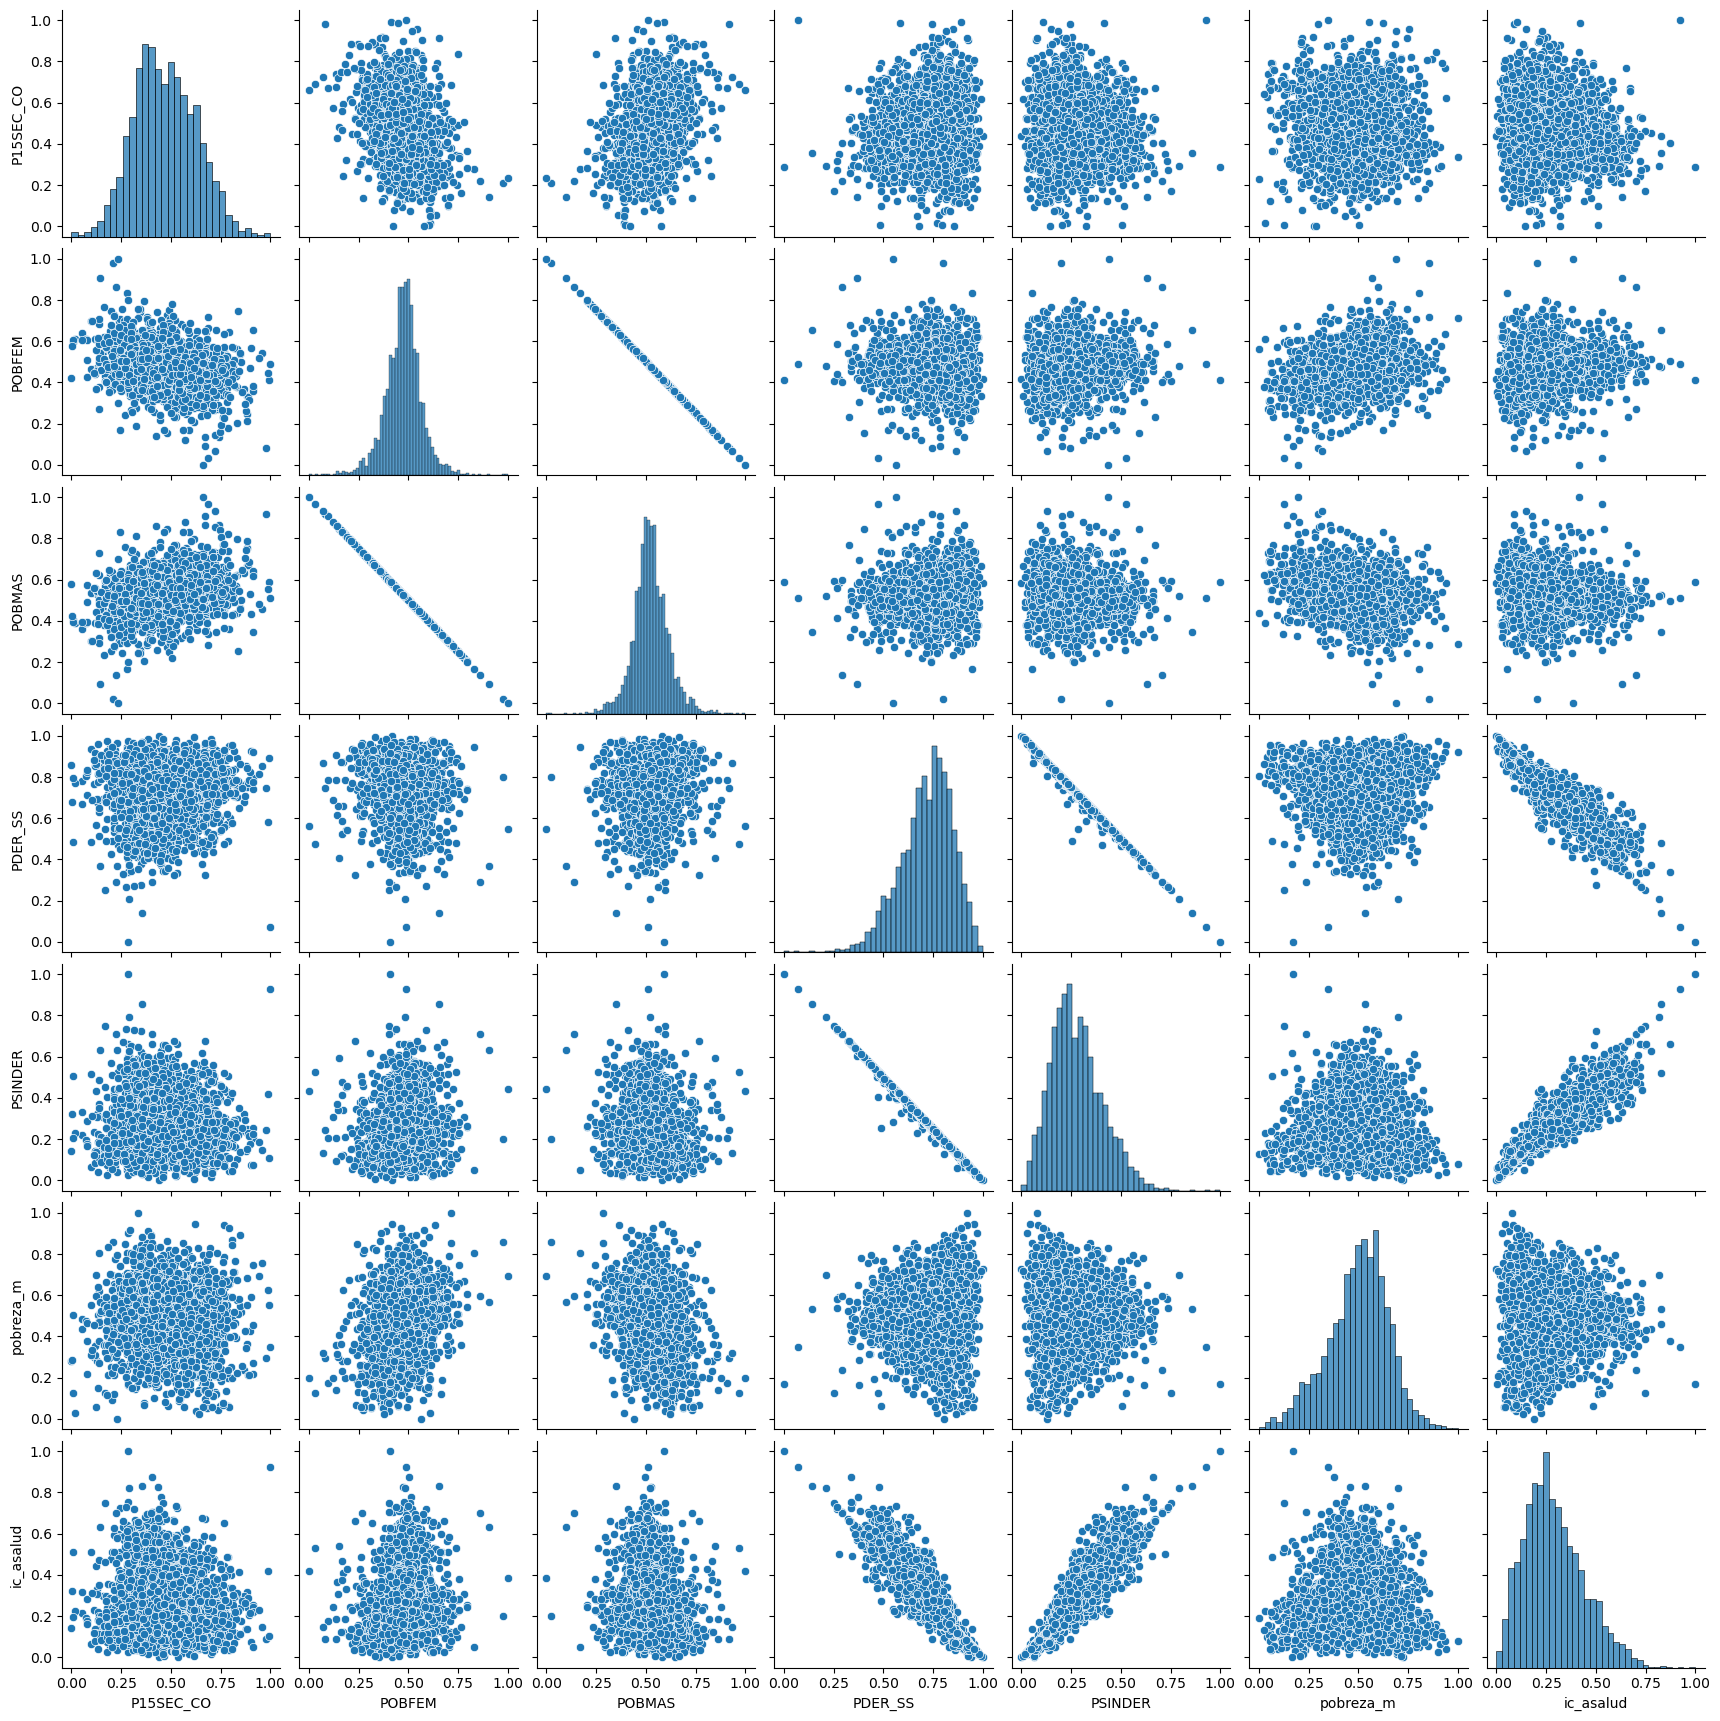

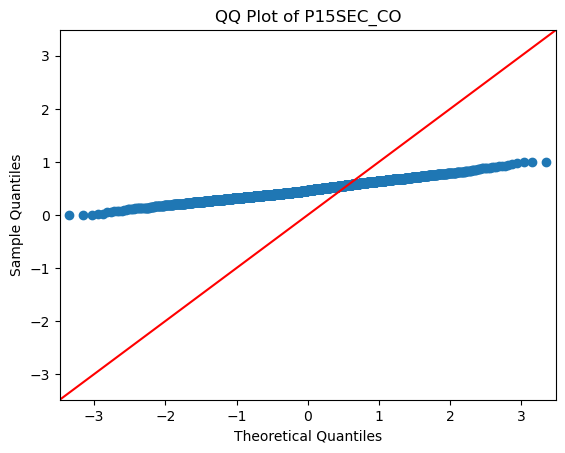

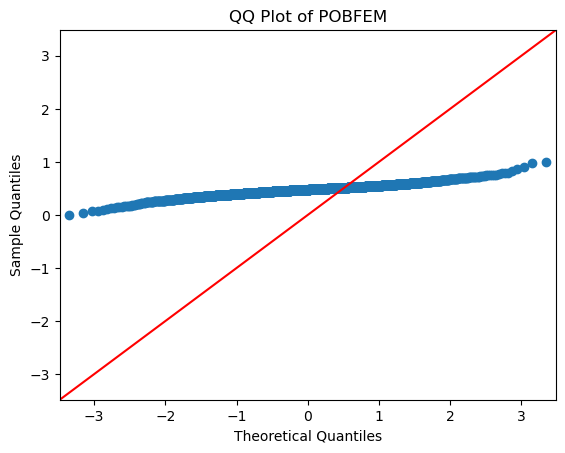

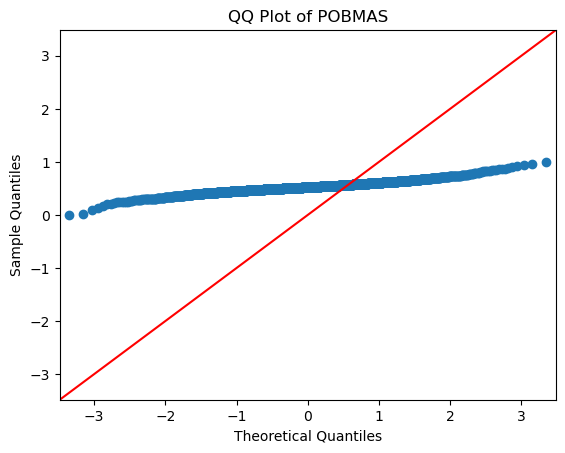

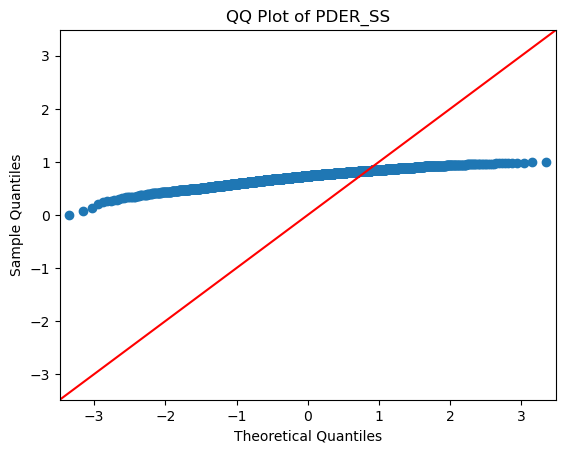

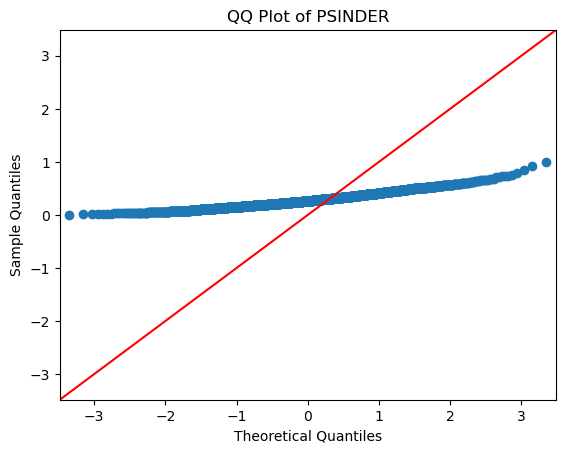

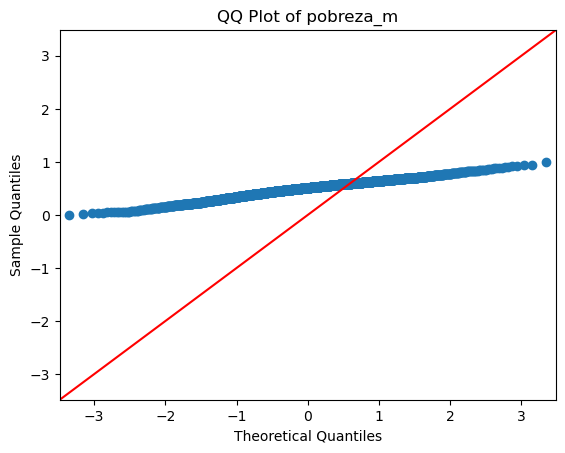

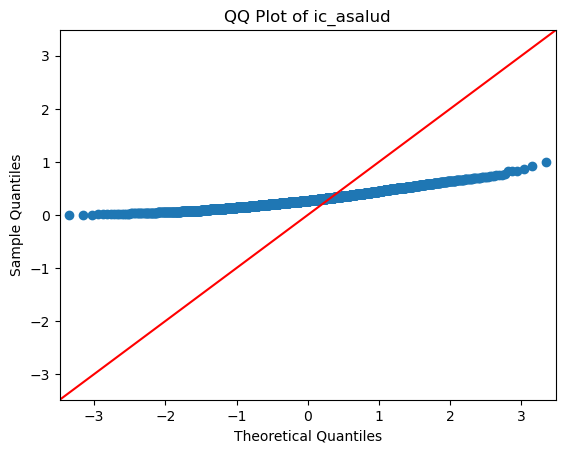

Statistics=0.9959103177149035, p=2.8842252513390724e-06
P15SEC_CO does not look Gaussian (reject H0)
Statistics=0.9720623693638735, p=1.5464718943028135e-21
POBFEM does not look Gaussian (reject H0)
Statistics=0.9720623693638754, p=1.5464718943053905e-21
POBMAS does not look Gaussian (reject H0)
Statistics=0.974990530187632, p=2.2418776010561287e-20
PDER_SS does not look Gaussian (reject H0)
Statistics=0.9748857471913164, p=2.0294987888424335e-20
PSINDER does not look Gaussian (reject H0)
Statistics=0.9884500321335183, p=3.108016691899487e-13
pobreza_m does not look Gaussian (reject H0)
Statistics=0.9705922673987346, p=4.362562664425627e-22
ic_asalud does not look Gaussian (reject H0)


In [248]:
# Exploracion mediante herramientas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas de las variables seleccionadas
data.hist(figsize=(12, 8))
plt.suptitle('Histogram of Selected Variables')
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Boxplot of Selected Variables')
plt.xticks(rotation=45)
plt.show()

# Correlación
correlation = data.corr(method='kendall')
sns.heatmap(correlation, annot=True)
plt.show()

# Scaterplot matrix
sns.pairplot(data)
plt.show()

# qqplot
import statsmodels.api as sm
import scipy.stats as stats

for col in data.columns:
    sm.qqplot(data[col], line ='45')
    plt.title(f'QQ Plot of {col}')
    plt.show()

# Normality test
for col in data.columns:
    stat, p = stats.shapiro(data[col])
    print(f'Statistics={stat}, p={p}')
    alpha = 0.05
    if p > alpha:
        print(f'{col} looks Gaussian (fail to reject H0)')
    else:
        print(f'{col} does not look Gaussian (reject H0)')





# Calidad de los datos
En las variables elegidas solo se econtraron tres municipios que contenian errores o falta de valores.
